In [2]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.image as img

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.externals.six import StringIO

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [3]:
# read in csv file 
csv_url = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/drug200.csv'

df = pd.read_csv(csv_url)
df.head(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
5,22,F,NORMAL,HIGH,8.607,drugX
6,49,F,NORMAL,HIGH,16.275,drugY
7,41,M,LOW,HIGH,11.037,drugC
8,60,M,NORMAL,HIGH,15.171,drugY
9,43,M,LOW,NORMAL,19.368,drugY


# Data Preprocessing

In [4]:
# identify any missing values
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
Age            200 non-null int64
Sex            200 non-null object
BP             200 non-null object
Cholesterol    200 non-null object
Na_to_K        200 non-null float64
Drug           200 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [6]:
# shape and size of dataset
print(df.size)
print(df.shape)

1200
(200, 6)


# Dataset is cleaned  

**Build Model**

In [7]:
# create indpendent variable X as the feature data
X = df.drop(columns='Drug').values
print(X[:5])
# create dependent variable Y as the target
Y = df['Drug']
print(Y[:5])

[[23 'F' 'HIGH' 'HIGH' 25.355]
 [47 'M' 'LOW' 'HIGH' 13.093]
 [47 'M' 'LOW' 'HIGH' 10.113999999999999]
 [28 'F' 'NORMAL' 'HIGH' 7.797999999999999]
 [61 'F' 'LOW' 'HIGH' 18.043]]
0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object


**Majority of the features in the dataset are categorical, we can use pd.get_dummies to fix this, or we can use LabelEncoder() from the Sklearn preprocessing library**

In [8]:
# create LabelEncoder object for each features 'sex', 'BP', 'Cholesterol'
# 'Sex'
le_sex = LabelEncoder()
# fit object with values of features
le_sex.fit(['M', 'F'])
X[:,1] = le_sex.transform(X[:,1])

# 'BP'
le_bp = LabelEncoder()
# fit object with values of features
le_bp.fit(['HIGH', 'NORMAL', 'LOW'])
X[:,2] = le_bp.transform(X[:,2])

# 'Cholesterol'
le_chol = LabelEncoder()
# fit object with values of features
le_chol.fit(['HIGH', 'NORMAL'])
X[:,3] = le_chol.transform(X[:,3])

X[:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.113999999999999],
       [28, 0, 2, 0, 7.797999999999999],
       [61, 0, 1, 0, 18.043]], dtype=object)

In [9]:
# create training and testing data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=3)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(150, 5) (150,)
(50, 5) (50,)


In [10]:
# create and fit Drug_tree onject
Drug_tree = DecisionTreeClassifier()
Drug_tree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [11]:
# estimate 
yhat = Drug_tree.predict(x_test)
yhat[:5]

array(['drugY', 'drugX', 'drugX', 'drugX', 'drugX'], dtype=object)

In [12]:
# create dataframe of predicted and actual values of target 
act_pred = pd.DataFrame({'Actual Values':y_test, 'Predicted Values':yhat})
act_pred.head(10)

,Actual Values,Predicted Values
40,drugY,drugY
51,drugX,drugX
139,drugX,drugX
197,drugX,drugX
170,drugX,drugX
82,drugC,drugC
183,drugY,drugY
46,drugA,drugA
70,drugB,drugB
100,drugA,drugA


In [13]:
# accuracy of the model
score = Drug_tree.score(x_test, y_test)  #alternatively, accuracy_score(y_test, yhat)
print('Accuracy of the model: ', score)

Accuracy of the model:  0.98


In [14]:
from sklearn.metrics import classification_report
report = classification_report(y_test, yhat)
print(report)

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         6
       drugB       1.00      1.00      1.00         4
       drugC       1.00      1.00      1.00         5
       drugX       1.00      0.94      0.97        17
       drugY       0.95      1.00      0.97        18

    accuracy                           0.98        50
   macro avg       0.99      0.99      0.99        50
weighted avg       0.98      0.98      0.98        50



### 

### The model has a high accuracy (98%) in predicted whether Drug A,B,C,X,Y should be administered to patients  


# Visualization

In [15]:

# import necessary libraries
import pydotplus
from IPython.display import Image
from sklearn.tree import export_graphviz

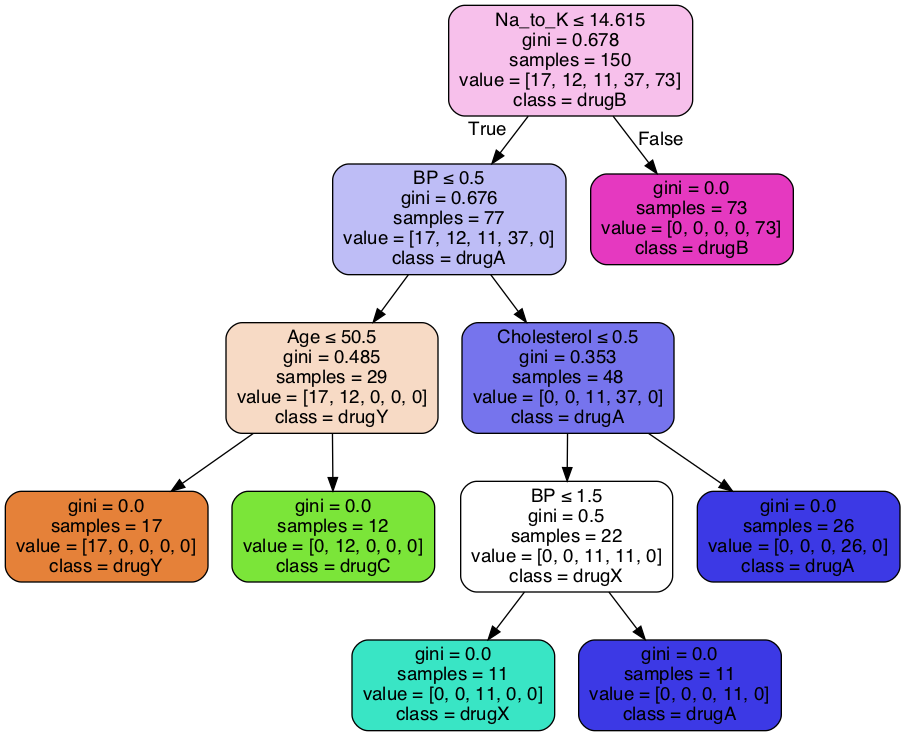

In [16]:
# create dot object
dot_data = StringIO()

# file name
file_name = 'drug_tree.png'

# feature and target names
feature = df.columns[0:5]
target = df['Drug'].unique().tolist()

out = export_graphviz(Drug_tree, 
                      out_file=dot_data, 
                      feature_names = feature, 
                      class_names = target, 
                      filled = True, 
                      rounded = True, 
                      special_characters = True)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png(file_name)

# Show graph
Image(graph.create_png())